<a href="https://colab.research.google.com/github/Aliounegahn/Machine-Learning-Projects/blob/master/auto_encoder_MNIST_moodle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto encoder

## Loading and transforming the data

We will consider the MNIST database which contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. in a first time, we load the data.

In [1]:
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers.core import Dense, Dropout, Activation,Flatten,Reshape
from keras.layers import Conv2D, MaxPooling2D,UpSampling2D,InputLayer
from keras.optimizers import SGD,Adam
from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import numpy as np
from keras import backend as K
import keras
import matplotlib.pyplot as plt

def loadMNISTAsVector(subset=10000) :
    nb_classes=10
    (X_train_img, y_train_real), (X_test_img, y_test_real) = mnist.load_data()
    X_train_vect = X_train_img[:subset].reshape(subset, 784)
    X_test_vect = X_test_img.reshape(10000, 784)
    X_train_vect = X_train_vect.astype("float32")
    X_test_vect = X_test_vect.astype("float32")
    X_train_vect /= 255
    X_test_vect /= 255
    y_train_cat = np_utils.to_categorical(y_train_real[:subset], nb_classes)
    y_test_cat = np_utils.to_categorical(y_test_real, nb_classes)
    return (X_train_vect, y_train_cat), (X_test_vect, y_test_cat)
    
def loadMNISTAsMaxtrix(subset=10000) :
    nb_classes=10
    img_rows, img_cols = 28, 28
    (X_train_img, y_train_real), (X_test_img, y_test_real) = mnist.load_data()
    X_train_mat = X_train_img[:subset].reshape(X_train_img[:subset].shape[0], img_rows, img_cols, 1)
    X_test_mat = X_test_img.reshape(X_test_img.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    X_train_mat = X_train_mat.astype('float32')
    X_test_mat = X_test_mat.astype('float32')
    X_train_mat /= 255
    X_test_mat /= 255
    y_train_cat = np_utils.to_categorical(y_train_real[:subset], nb_classes)
    y_test_cat = np_utils.to_categorical(y_test_real, nb_classes)
    return (X_train_mat, y_train_cat), (X_test_mat, y_test_cat)

def compare(decoded_imgs,img):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(img[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

(X_train_mat, y_train_cat), (X_test_mat, y_test_cat) =loadMNISTAsMaxtrix()
(X_train_vect, y_train_cat), (X_test_vect, y_test_cat) =loadMNISTAsVector()


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


We now have vectors instead of images

## Multi layered auto encoder

In [2]:
def getAutoEncoder(encoding_dim = 1):
    model = Sequential()
    #encoder
    model.add(InputLayer(input_shape=(784,)))
    
    #space reduction
    model.add(Dense(encoding_dim,activation='relu',name='featurespace'))
   
    #Decoder
     
    

    model.add(Dense(784, activation='sigmoid'))
    
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy',  optimizer=sgd)

   
    return model

model=getAutoEncoder(encoding_dim = 1)
model.summary()










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
featurespace (Dense)         (None, 1)                 785       
_________________________________________________________________
dense_1 (Dense)              (None, 784)               1568      
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


In [3]:
(X_train_vect, _), (X_test_vect, _) =loadMNISTAsVector(subset=10000)
model=getAutoEncoder(encoding_dim = 32)
batch_size = 256
epochs=20
model.fit(X_train_vect, X_train_vect,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test_vect, X_test_vect))




Train on 10000 samples, validate on 10000 samples
Epoch 1/20





10000/10000 [==============================] - 5s 460us/step - loss: 0.6802 - val_loss: 0.6382
Epoch 2/20
10000/10000 [==============================] - 0s 29us/step - loss: 0.4737 - val_loss: 0.3096
Epoch 3/20
10000/10000 [==============================] - 0s 29us/step - loss: 0.2895 - val_loss: 0.2801
Epoch 4/20
10000/10000 [==============================] - 0s 29us/step - loss: 0.2779 - val_loss: 0.2754
Epoch 5/20
10000/10000 [==============================] - 0s 28us/step - loss: 0.2743 - val_loss: 0.2727
Epoch 6/20
10000/10000 [==============================] - 0s 28us/step - loss: 0.2718 - val_loss: 0.2704
Epoch 7/20
10000/10000 [==============================] - 0s 29us/step - loss: 0.2695 - val_loss: 0.2682
Epoch 8/20
10000/10000 [==============================] - 0s 30us/step - loss: 0.2670 - val_loss: 0.2655
Epoch 9/20
10000/10000 [==============================] - 0s 28us/step - loss: 0.2643 - val_loss: 0.2

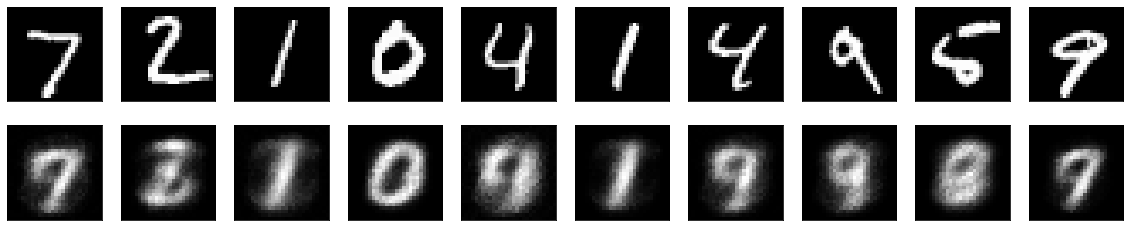

In [4]:
decoded_imgs = model.predict(X_test_vect)
compare(decoded_imgs,X_test_vect )

## CNN auto encoders

In [0]:
def getCNNAutoEncoder(encoding_dim = 1):
    model = Sequential()
    #encoder
    model.add(InputLayer(input_shape=(28,28,1)))
    model.add(Conv2D(32, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(32, (3, 3),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2))) # images 14x14
    model.add(Conv2D(64,(3, 3),  padding='same',activation='relu'))
    model.add(Conv2D(64,(3, 3),  padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))# images 7x7
    
    
    
    model.add(Flatten())                    #64x7x7
    model.add(Dense(encoding_dim,activation='relu',name='featurespace')) #32
   
    
    nb_img=64
    model.add(Dense(nb_img*7*7,activation='relu')) #nb_imgx7x7
    #Decoder
    model.add(Reshape((7, 7,nb_img))) #nb_imgx7x7
    model.add(UpSampling2D((2, 2))) #images 14x14
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
   
    model.add(UpSampling2D((2, 2))) #images 28x28
   
    model.add(Conv2D(32, (3, 3),  padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3),  padding='same', activation='relu'))
    model.add(Conv2D(16, (3, 3),  padding='same', activation='relu'))
    model.add(Conv2D(1, (3, 3),  padding='same', activation='sigmoid'))
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy',  optimizer=Adam())

   
    return model


In [12]:
model=getCNNAutoEncoder(encoding_dim = 32)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)             

In [13]:
(X_train_mat, _), (X_test_mat, _) =loadMNISTAsMaxtrix()
model=getCNNAutoEncoder(encoding_dim = 32)
batch_size = 256
epochs=50
model.fit(X_train_mat, X_train_mat,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test_mat, X_test_mat))

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 9s 884us/step - loss: 0.3607 - val_loss: 0.2777
Epoch 2/50
10000/10000 [==============================] - 5s 451us/step - loss: 0.2440 - val_loss: 0.2116
Epoch 3/50
10000/10000 [==============================] - 5s 452us/step - loss: 0.1996 - val_loss: 0.1904
Epoch 4/50
10000/10000 [==============================] - 4s 450us/step - loss: 0.1810 - val_loss: 0.1725
Epoch 5/50
10000/10000 [==============================] - 5s 451us/step - loss: 0.1613 - val_loss: 0.1512
Epoch 6/50
10000/10000 [==============================] - 5s 452us/step - loss: 0.1405 - val_loss: 0.1523
Epoch 7/50
10000/10000 [==============================] - 5s 451us/step - loss: 0.1303 - val_loss: 0.1230
Epoch 8/50
10000/10000 [==============================] - 5s 451us/step - loss: 0.1199 - val_loss: 0.1177
Epoch 9/50
10000/10000 [==============================] - 5s 451us/step - loss: 0.1121 - val_loss: 0.1

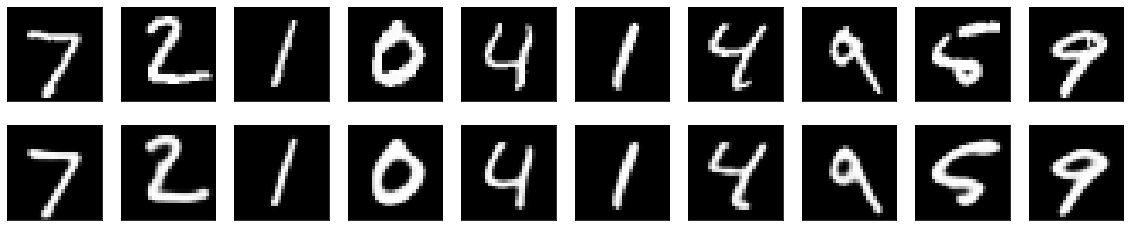

In [14]:
decoded_imgs = model.predict(X_test_mat)
compare(decoded_imgs,X_test_mat )

# Denoising

In [0]:
noise_factor = 0.1
x_train_noisy = X_train_mat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_mat.shape) 
x_test_noisy = X_test_mat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_mat.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

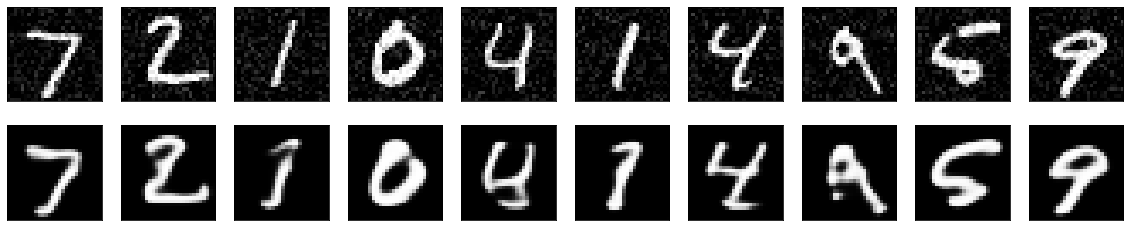

In [16]:
decoded_imgs = model.predict(x_test_noisy)
compare(decoded_imgs,x_test_noisy )

# Image correction

## denoising

In [0]:
noise_factor = 0.5
x_train_noisy = X_train_mat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_mat.shape) 
x_test_noisy = X_test_mat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_mat.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [25]:
model=getCNNAutoEncoder(encoding_dim = 32)
batch_size = 256
epochs=20
model.fit(x_train_noisy, X_train_mat,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_noisy, X_test_mat))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 6s 620us/step - loss: 0.3489 - val_loss: 0.2667
Epoch 2/20
10000/10000 [==============================] - 5s 457us/step - loss: 0.2651 - val_loss: 0.2631
Epoch 3/20
10000/10000 [==============================] - 5s 459us/step - loss: 0.2559 - val_loss: 0.2462
Epoch 4/20
10000/10000 [==============================] - 5s 458us/step - loss: 0.2178 - val_loss: 0.1909
Epoch 5/20
10000/10000 [==============================] - 5s 456us/step - loss: 0.1706 - val_loss: 0.1617
Epoch 6/20
10000/10000 [==============================] - 5s 460us/step - loss: 0.1497 - val_loss: 0.1471
Epoch 7/20
10000/10000 [==============================] - 5s 456us/step - loss: 0.1387 - val_loss: 0.1353
Epoch 8/20
10000/10000 [==============================] - 5s 456us/step - loss: 0.1302 - val_loss: 0.1287
Epoch 9/20
10000/10000 [==============================] - 5s 457us/step - loss: 0.1241 - val_loss: 0.1

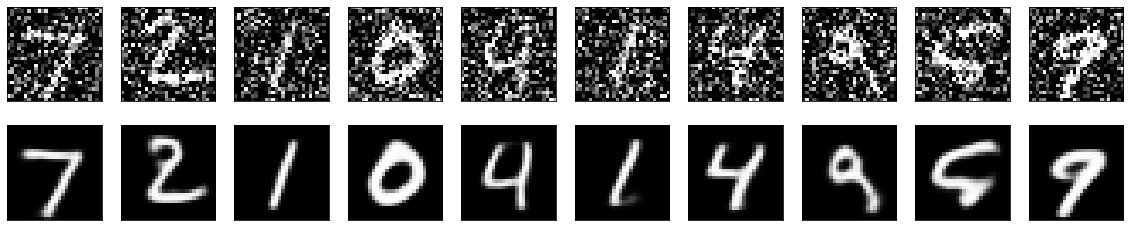

In [26]:
decoded_imgs = model.predict(x_test_noisy)
compare(decoded_imgs,x_test_noisy )

In [0]:
(X_train_mat, _), (X_test_mat, _) =loadMNISTAsMaxtrix()
X_train_crop=np.copy(X_train_mat)
X_train_crop[:,:14,:14,]=0
X_test_crop=np.copy(X_test_mat)
X_test_crop[:,:14,:14,]=0


In [28]:
model=getCNNAutoEncoder(encoding_dim = 32)
batch_size = 256
epochs=50
model.fit(X_train_crop, X_train_mat,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test_crop, X_test_mat))

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 6s 630us/step - loss: 0.3781 - val_loss: 0.2651
Epoch 2/50
10000/10000 [==============================] - 5s 453us/step - loss: 0.2479 - val_loss: 0.2206
Epoch 3/50
10000/10000 [==============================] - 5s 459us/step - loss: 0.1919 - val_loss: 0.1671
Epoch 4/50
10000/10000 [==============================] - 5s 453us/step - loss: 0.1524 - val_loss: 0.1429
Epoch 5/50
10000/10000 [==============================] - 5s 455us/step - loss: 0.1344 - val_loss: 0.1337
Epoch 6/50
10000/10000 [==============================] - 5s 455us/step - loss: 0.1235 - val_loss: 0.1226
Epoch 7/50
10000/10000 [==============================] - 5s 454us/step - loss: 0.1160 - val_loss: 0.1157
Epoch 8/50
10000/10000 [==============================] - 5s 453us/step - loss: 0.1138 - val_loss: 0.1102
Epoch 9/50
10000/10000 [==============================] - 5s 454us/step - loss: 0.1075 - val_loss: 0.1

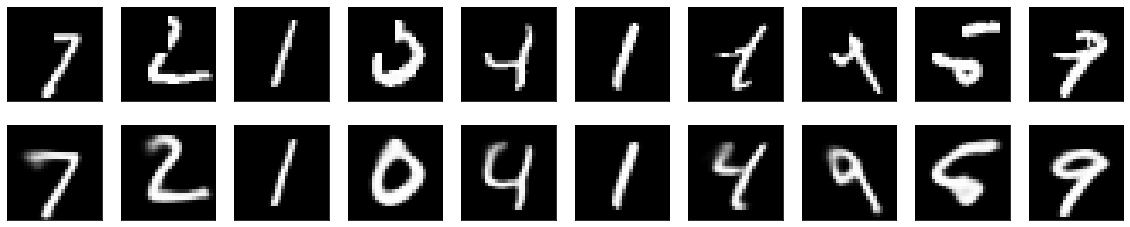

In [29]:
decoded_imgs = model.predict(X_test_crop)
compare(decoded_imgs,X_test_crop )

## Hidden layer representation
You can make a model that predict the values corresponding to the neurons inside an hidden layer by the following way :

In [0]:
layer_output = model.get_layer('featurespace').output
latent=Model(inputs=model.input,outputs=layer_output)
lattest = latent.predict(X_test_mat)

In [32]:
lattest.shape, X_test_mat.shape

((10000, 32), (10000, 28, 28, 1))

# Questions
* by using an encoding dimension of size 2, represent in 2 dimension the MNIST data with an auto encoder. Add the colors corresponding to the class. Use different activation function just before the hidden representation to see the difference
* build an auto encode for all the dataset except the images corresponding to 5. Build the latent representation of all the data and try to detect the 5 as an outlier.

In [45]:
(X_train_mat, _), (X_test_mat, ytestmat) =loadMNISTAsMaxtrix()
model=getCNNAutoEncoder(encoding_dim = 2)
batch_size = 256
epochs=50
model.fit(X_train_mat, X_train_mat,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test_mat, X_test_mat))

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 7s 663us/step - loss: 0.3810 - val_loss: 0.2610
Epoch 2/50
10000/10000 [==============================] - 5s 453us/step - loss: 0.2474 - val_loss: 0.2401
Epoch 3/50
10000/10000 [==============================] - 5s 452us/step - loss: 0.2333 - val_loss: 0.2294
Epoch 4/50
10000/10000 [==============================] - 5s 456us/step - loss: 0.2215 - val_loss: 0.2210
Epoch 5/50
10000/10000 [==============================] - 5s 451us/step - loss: 0.2156 - val_loss: 0.2154
Epoch 6/50
10000/10000 [==============================] - 5s 451us/step - loss: 0.2127 - val_loss: 0.2127
Epoch 7/50
10000/10000 [==============================] - 4s 450us/step - loss: 0.2100 - val_loss: 0.2122
Epoch 8/50
10000/10000 [==============================] - 5s 456us/step - loss: 0.2080 - val_loss: 0.2095
Epoch 9/50
10000/10000 [==============================] - 4s 449us/step - loss: 0.2060 - val_loss: 0.2

In [46]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3136)            

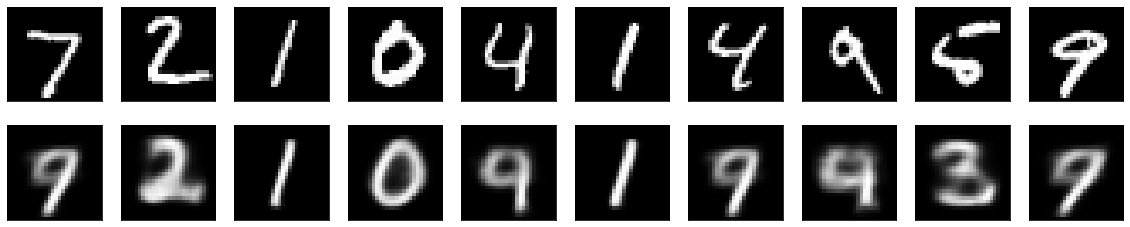

In [47]:
decoded_imgs = model.predict(X_test_mat)
compare(decoded_imgs,X_test_mat )

In [0]:
layer_output = model.get_layer('featurespace').output
latent=Model(inputs=model.input,outputs=layer_output)
lattest = latent.predict(X_test_mat)

In [49]:
lattest

array([[2.5544431 , 1.8616731 ],
       [0.8426564 , 1.2656459 ],
       [3.1381617 , 0.39874583],
       ...,
       [2.4223397 , 1.5551202 ],
       [1.3209932 , 0.13670361],
       [0.500672  , 0.6270485 ]], dtype=float32)

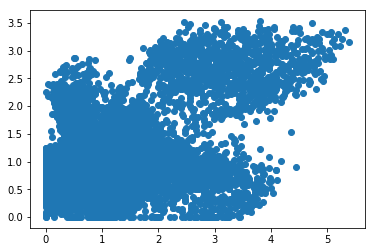

In [42]:
plt.scatter([x[0] for x in lattest],[x[1] for x in lattest ], colors = color(np.argmax[ytest]))